# Titanic dataset clean up

## Imports and functions

In [36]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in data

In [61]:
df = pd.read_csv("/Users/tiansu/Documents/git/intro_to_data_science_2017/data/titanic/train.csv")

## Visual inspection

In [62]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Missing value imputation

In [63]:
# deal with null value 
df.ix[5, 'Age']

nan

In [64]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html
# or
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
df_null = pd.isnull(df)
mean_age = df.Age.mean()
df.ix[df_null.Age, 'Age'] = mean_age
df.ix[5, 'Age']

29.69911764705882

In [65]:
# check out sklearn's imputer
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html

In [66]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [67]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

## Let's select features

In [71]:
# what are the features likely to be predictive of survival?
# read the dictionary: 
# https://www.kaggle.com/c/titanic/data

### visualize the data

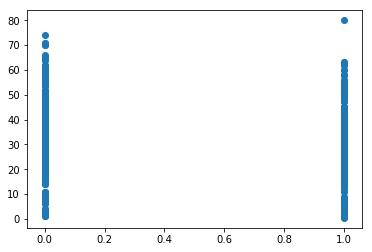

In [68]:
# scatter plot
plt.scatter(df.Survived, df.Age)

{'boxes': [<matplotlib.lines.Line2D at 0x1156eeb50>,
 'caps': [<matplotlib.lines.Line2D at 0x115737a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x115741d90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x115741750>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1156eed10>,
  <matplotlib.lines.Line2D at 0x11575b090>]}

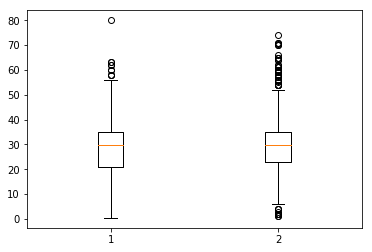

In [69]:
# boxplot
survivor_age = df.Age[df.Survived == 1].values
deceased_age = df.Age[df.Survived == 0].values
plt.boxplot([survivor_age, deceased_age])

In [70]:
# Any other kind of plots you find useful?
# https://matplotlib.org/users/screenshots.html

## Drop the columns not needed

In [74]:
# http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.drop.html

## Deal with catogorical variables

In [72]:
# checkout pandas pd.get_dummies

In [73]:
pd.get_dummies(df, prefix='dummy')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"dummy_Abbing, Mr. Anthony","dummy_Abbott, Mr. Rossmore Edward","dummy_Abbott, Mrs. Stanton (Rosa Hunt)",...,dummy_F G73,dummy_F2,dummy_F33,dummy_F38,dummy_F4,dummy_G6,dummy_T,dummy_C,dummy_Q,dummy_S
0,1,0,3,22.000000,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.000000,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,29.699118,0,0,8.4583,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,7,0,1,54.000000,0,0,51.8625,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,3,2.000000,3,1,21.0750,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,9,1,3,27.000000,0,2,11.1333,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1,2,14.000000,1,0,30.0708,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Save the model ready data